In [2]:
import numpy as np
import pandas as pd

In [49]:
df = pd.read_csv('./Data/Data_v2.csv') # dataframe
df.head(10)

,English,Vietnamese
0,One of the 3 owners of the 2024 Nobel Prize in...,Một trong 3 chủ nhân của giải Nobel hóa học 20...
1,"From Hanoi, he sent a message to Vietnamese st...","Từ Hà Nội, ông đã gửi lời nhắn tới sinh viên V..."
2,"Recently, on her personal page, Dr. Le Mai Lan...","Mới đây, trên trang cá nhân của mình, TS Lê Ma..."
3,"Sharing with Thanh Nien Newspaper, Dr. Le Mai ...","Chia sẻ với Báo Thanh Niên, TS Lê Mai Lan nhớ ..."
4,"Before the award ceremony, I met and interview...","Trước lễ trao giải, tôi đã gặp và phỏng vấn Jo..."
5,"She is very young, with shaggy hair, khaki pan...","Cô ấy rất trẻ, tóc tai bù xù, quần kaki, áo le..."
6,"At that time, I saw that she was too impressed...","Khi đó tôi đã thấy bạn ấy quá ấn tượng, công t..."
7,"At that moment, I firmly believed that she wou...",Cũng ngay lúc đó tôi đã tin tưởng chắc chắn rằ...
8,"The other scientist, the co-owner of the speci...","Nhà khoa học còn lại, đồng chủ nhân giải đặc b..."
9,Dr. Demis Hassabis is also one of three scient...,TS Demis Hassabis cũng là một trong số ba nhà ...


**Filter necessery data**

In [50]:
columns = ['English', 'Vietnamese']
df = df[columns]
df.head()

,English,Vietnamese
0,One of the 3 owners of the 2024 Nobel Prize in...,Một trong 3 chủ nhân của giải Nobel hóa học 20...
1,"From Hanoi, he sent a message to Vietnamese st...","Từ Hà Nội, ông đã gửi lời nhắn tới sinh viên V..."
2,"Recently, on her personal page, Dr. Le Mai Lan...","Mới đây, trên trang cá nhân của mình, TS Lê Ma..."
3,"Sharing with Thanh Nien Newspaper, Dr. Le Mai ...","Chia sẻ với Báo Thanh Niên, TS Lê Mai Lan nhớ ..."
4,"Before the award ceremony, I met and interview...","Trước lễ trao giải, tôi đã gặp và phỏng vấn Jo..."


In [5]:
df.shape

(125, 2)

In [6]:
df = df.dropna() # remove rows with missing values
df.shape

(125, 2)

**create eng_data, vi_data**

In [7]:
eng_data = df['English']
eng_data.head()

0    One of the 3 owners of the 2024 Nobel Prize in...
1    From Hanoi, he sent a message to Vietnamese st...
2    Recently, on her personal page, Dr. Le Mai Lan...
3    Sharing with Thanh Nien Newspaper, Dr. Le Mai ...
4    Before the award ceremony, I met and interview...
Name: English, dtype: object

In [8]:
# Append <START> and <END> to each english sentence
START = 'ssss '
END = ' eeee'

df['English'] = df['English'].apply(lambda x: START+x+END)
df.head()

,English,Vietnamese
0,ssss One of the 3 owners of the 2024 Nobel Pri...,Một trong 3 chủ nhân của giải Nobel hóa học 20...
1,"ssss From Hanoi, he sent a message to Vietname...","Từ Hà Nội, ông đã gửi lời nhắn tới sinh viên V..."
2,"ssss Recently, on her personal page, Dr. Le Ma...","Mới đây, trên trang cá nhân của mình, TS Lê Ma..."
3,"ssss Sharing with Thanh Nien Newspaper, Dr. Le...","Chia sẻ với Báo Thanh Niên, TS Lê Mai Lan nhớ ..."
4,"ssss Before the award ceremony, I met and inte...","Trước lễ trao giải, tôi đã gặp và phỏng vấn Jo..."


In [9]:
eng_text = df['English'].tolist()
vi_text = df['Vietnamese'].tolist()

print(eng_text[5])
print(vi_text[5])
print(eng_text[6])
print(vi_text[6])
print(eng_text[7])
print(vi_text[7])

ssss She is very young, with shaggy hair, khaki pants, and a turtleneck sweater, not much different from the students I still meet every day at VinUni. eeee
Cô ấy rất trẻ, tóc tai bù xù, quần kaki, áo len cổ lọ, không khác nhiều các sinh viên mà tôi vẫn gặp hàng ngày ở VinUni.
ssss At that time, I saw that she was too impressed, the work that her group did was so great. eeee
Khi đó tôi đã thấy bạn ấy quá ấn tượng, công trình mà nhóm bạn ấy làm quá vĩ đại.
ssss At that moment, I firmly believed that she would go a long way, and felt honored to meet such a wonderful person!" eeee
Cũng ngay lúc đó tôi đã tin tưởng chắc chắn rằng bạn ấy sẽ còn tiến rất xa, và cảm thấy vinh hạnh được tiếp xúc một người tuyệt vời như vậy!".


# Preprocessing data

Original

In [10]:
from pprint import pprint

In [11]:
print('"English Texts:"')
pprint(eng_text[:5])
print("Vietnamese Texts:")
pprint( vi_text[:5])

"English Texts:"
['ssss One of the 3 owners of the 2024 Nobel Prize in Chemistry came to '
 'Vietnam in 2022 to receive the VinFuture Prize. eeee',
 'ssss From Hanoi, he sent a message to Vietnamese students to dare to dream '
 'big things like himself in his youth. eeee',
 'ssss Recently, on her personal page, Dr. Le Mai Lan, Chairman of the Board '
 'of Trustees of VinUni University shared a photo she took with Dr. John '
 'Jumper (born in 1985) from December 2022. eeee',
 'ssss Sharing with Thanh Nien Newspaper, Dr. Le Mai Lan recalled: "Dr. John '
 "Jumper is one of the two scientists who won the special prize in VinFuture's "
 'new fields research 2022 thanks to the work of the artificial intelligence '
 'system that decodes the AlphaFold 2 protein. eeee',
 'ssss Before the award ceremony, I met and interviewed John at the Metropole '
 'Hotel, Hanoi. eeee']
Vietnamese Texts:
['Một trong 3 chủ nhân của giải Nobel hóa học 2024 đã từng đến Việt Nam năm '
 '2022 để nhận giải thưởng Vi

Create Tokenizerwrap class

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:

class TokenizerWrap(Tokenizer):
    """
    Wrap the Tokenizer-class from Keras with more functionality.
    mở rộng từ Tokenizer của Keras với nhiều chức năng hơn.
    """
    
    def __init__(self, texts, padding,
                 reverse=False, num_words=None):
        """
        :param texts: List of strings. This is the data-set.
        :param padding: Either 'post' or 'pre' padding.
        :param reverse: Boolean whether to reverse token-lists.
        :param num_words: Max number of words to use.
        """

        Tokenizer.__init__(self, num_words=num_words)

        # Create the vocabulary from the texts.
        # Tạo từ điển từ các từ trong văn bản, đều là các unique word thuộc cả 2 ngôn ngữ, 
        # phương thức cũng ánh xạ luôn mỗi từ thành 1 số nguyên duy nhất.
        self.fit_on_texts(texts)

        # Create inverse lookup from integer-tokens to words.
        # Tạo ánh xạ ngược từ số nguyên thành từ.
        self.index_to_word = dict(zip(self.word_index.values(),
                                      self.word_index.keys()))

        # Convert all texts to lists of integer-tokens.
        # Note that the sequences may have different lengths.
        # Chuyển đổi tất cả các văn bản thành danh sách các token số nguyên (self.tokens).
        self.tokens = self.texts_to_sequences(texts)

        if reverse:
            # Reverse the token-sequences.
            self.tokens = [list(reversed(x)) for x in self.tokens]
        
            # Sequences that are too long should now be truncated
            # at the beginning, which corresponds to the end of
            # the original sequences.
            truncating = 'pre'
        else:
            # Sequences that are too long should be truncated
            # at the end.
            truncating = 'post'

        # The number of integer-tokens in each sequence.
        # Tính toán số lượng token trong mỗi sequence.
        self.num_tokens = [len(x) for x in self.tokens]

        # Max number of tokens to use in all sequences.
        # We will pad / truncate all sequences to this length.
        # This is a compromise so we save a lot of memory and
        # only have to truncate maybe 5% of all the sequences.
        # Tính toán số lượng token tối đa để sử dụng trong tất cả các sequence.
        self.max_tokens = np.mean(self.num_tokens) \
                          + 2 * np.std(self.num_tokens)
        self.max_tokens = int(self.max_tokens)

        # Pad / truncate all token-sequences to the given length.
        # This creates a 2-dim numpy matrix that is easier to use.
        # Thực hiện padding hoặc cắt ngắn tất cả các danh sách token để có độ dài cố định.
        self.tokens_padded = pad_sequences(self.tokens,
                                           maxlen=self.max_tokens,
                                           padding=padding,
                                           truncating=truncating)

    def token_to_word(self, token):
        """
        Lookup a single word from an integer-token.
        Chuyển đổi một token số nguyên thành từ tương ứng
        """

        word = " " if token == 0 else self.index_to_word[token]
        return word 

    def tokens_to_string(self, tokens):
        """
        Convert a list of integer-tokens to a string.
        Chuyển đổi một danh sách các token số nguyên thành một chuỗi văn bản.
        """

        # Create a list of the individual words.
        words = [self.index_to_word[token]
                 for token in tokens
                 if token != 0]
        
        # Concatenate the words to a single string
        # with space between all the words.
        text = " ".join(words)

        return text
    
    def text_to_tokens(self, text, reverse=False, padding=False):
        """
        Convert a single text-string to tokens with optional
        reversal and padding.
        Chuyển đổi một chuỗi văn bản thành danh sách các token số nguyên, 
        với tùy chọn đảo ngược và padding.
        """

        # Convert to tokens. Note that we assume there is only
        # a single text-string so we wrap it in a list.
        tokens = self.texts_to_sequences([text])
        tokens = np.array(tokens)

        if reverse:
            # Reverse the tokens.
            tokens = np.flip(tokens, axis=1)

            # Sequences that are too long should now be truncated
            # at the beginning, which corresponds to the end of
            # the original sequences.
            truncating = 'pre'
        else:
            # Sequences that are too long should be truncated
            # at the end.
            truncating = 'post'

        if padding:
            # Pad and truncate sequences to the given length.
            tokens = pad_sequences(tokens,
                                   maxlen=self.max_tokens,
                                   padding='pre',
                                   truncating=truncating)

        return tokens

In [14]:
num_words = 10000

# Khởi tạo đối tượng TokenizerWrap cho tiếng Anh
tokenizer_eng = TokenizerWrap(texts=eng_text, padding='post', reverse=False, num_words=num_words)

# Khởi tạo đối tượng TokenizerWrap cho tiếng Việt
tokenizer_vi = TokenizerWrap(texts=vi_text, padding='pre', reverse=True, num_words=num_words)

*Lý do token_vi padding = pre do mô hình dịch máy thường yêu cầu input đầu vào phải đảo ngược*

## Word to index and index to word

Từ điển từng từ và vector số tương ứng của từ đó. (2 chiều word-vec, vec-word)

In [15]:
# Hiển thị từ điển và ánh xạ ngược
print("English Word Index:" )
pprint(list(tokenizer_eng.word_index.items())[:10])

print("Vietnamese Word Index:")
pprint(list(tokenizer_vi.word_index.items())[:10])

print("English Index to Word:")
pprint(list(tokenizer_eng.index_to_word.items())[:10])

print("Vietnamese Index to Word:")
pprint(list(tokenizer_vi.index_to_word.items())[:10])

English Word Index:
[('the', 1),
 ('ssss', 2),
 ('eeee', 3),
 ('of', 4),
 ('to', 5),
 ('and', 6),
 ('a', 7),
 ('in', 8),
 ('is', 9),
 ('that', 10)]
Vietnamese Word Index:
[('có', 1),
 ('là', 2),
 ('người', 3),
 ('và', 4),
 ('một', 5),
 ('của', 6),
 ('được', 7),
 ('cho', 8),
 ('với', 9),
 ('không', 10)]
English Index to Word:
[(1, 'the'),
 (2, 'ssss'),
 (3, 'eeee'),
 (4, 'of'),
 (5, 'to'),
 (6, 'and'),
 (7, 'a'),
 (8, 'in'),
 (9, 'is'),
 (10, 'that')]
Vietnamese Index to Word:
[(1, 'có'),
 (2, 'là'),
 (3, 'người'),
 (4, 'và'),
 (5, 'một'),
 (6, 'của'),
 (7, 'được'),
 (8, 'cho'),
 (9, 'với'),
 (10, 'không')]


## Number of token each sentence

In [16]:
# Hiển thị số lượng token trong mỗi câu
print("Number of Tokens in English Sentences:")
pprint(tokenizer_eng.num_tokens[:5])

print("Number of Tokens in Vietnamese Sentences:")
pprint(tokenizer_vi.num_tokens[:5])

Number of Tokens in English Sentences:
[24, 22, 35, 47, 16]
Number of Tokens in Vietnamese Sentences:
[23, 26, 37, 50, 17]


Số token tối đa ở mỗi dataset

In [17]:
# Hiển thị số lượng token tối đa
print("Max Tokens in English:")
pprint(tokenizer_eng.max_tokens)

print("Max Tokens in Vietnamese:")
pprint(tokenizer_vi.max_tokens)


Max Tokens in English:
48
Max Tokens in Vietnamese:
59


Nếu chọn số token tối đa làm số chiều của mỗi vector nhúng thì cần padding cho những câu không đủ max token. Ví dụ câu số 1 bản eng có 10 token (ví dụ), thì mình add thêm 38 token mang giá trị 0 (ae thấy ở trên index bắt đầu từ 1, còn 0 để cho phần padding này) 

ouput của bước này là vector nào trong eng cx đủ 48, vi đủ 50 nhá

à mục đích của bước tiền xử lý là biểu diễn các câu(sample) dưới dạng vector số cùng chiều nhé

In [18]:

# Hiển thị các câu đã được padding
print("Padded English Tokens:")
pprint(tokenizer_eng.tokens_padded[:5])

print("Padded Vietnamese Tokens:")
pprint(tokenizer_vi.tokens_padded[:5])

Padded English Tokens:
array([[  2,  42,   4,   1, 241, 432,   4,   1,  43,  44,  22,   8, 242,
        243,   5,  50,   8,  84,   5, 111,   1,  85,  22,   3,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,  14, 244, 245, 433,   7, 434,   5,  64,  51,   5, 435,   5,
        246, 154, 247, 112, 436,   8, 437, 438,   3,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2, 248,  17,  23, 155, 439,  24, 113, 156, 157, 440,   4,   1,
        441,   4, 442,   4, 249, 114,  86,   7, 443,  37, 444,  12,  24,
         87, 115, 445,   8, 446,  14, 447,  84,   3,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2, 250,  12, 448, 449, 450,  24, 113, 156, 157, 451,  24,  87,
        115,   9,  42,   4,   1, 251, 116,  29, 158,   1, 252,  22,   8,
        452,

**đấy thêm 1 đống 0**

In [19]:
tokenizer_eng.tokens_padded.shape

(125, 48)

In [20]:
tokenizer_vi.tokens_padded.shape

(125, 59)

In [21]:

# Hiển thị các câu đã được padding
print("Padded English Tokens:")
pprint(tokenizer_eng.tokens_padded[:5])

print("Padded Vietnamese Tokens:")
pprint(tokenizer_vi.tokens_padded[:5])

Padded English Tokens:
array([[  2,  42,   4,   1, 241, 432,   4,   1,  43,  44,  22,   8, 242,
        243,   5,  50,   8,  84,   5, 111,   1,  85,  22,   3,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,  14, 244, 245, 433,   7, 434,   5,  64,  51,   5, 435,   5,
        246, 154, 247, 112, 436,   8, 437, 438,   3,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2, 248,  17,  23, 155, 439,  24, 113, 156, 157, 440,   4,   1,
        441,   4, 442,   4, 249, 114,  86,   7, 443,  37, 444,  12,  24,
         87, 115, 445,   8, 446,  14, 447,  84,   3,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2, 250,  12, 448, 449, 450,  24, 113, 156, 157, 451,  24,  87,
        115,   9,  42,   4,   1, 251, 116,  29, 158,   1, 252,  22,   8,
        452,

Số token được pad cho mỗi cột dữ liệu

In [22]:
from pprint import pprint

# Đếm tổng số token trước khi sử dụng TokenizerWrap
total_tokens_eng_before = sum(len(sentence.split()) for sentence in eng_text)
total_tokens_vi_before = sum(len(sentence.split()) for sentence in vi_text)

# Đếm tổng số token sau khi padding
total_tokens_eng_after = tokenizer_eng.tokens_padded.size
total_tokens_vi_after = tokenizer_vi.tokens_padded.size

# Tính toán số token đã được thêm vào
total_tokens_eng_padded = total_tokens_eng_after - total_tokens_eng_before
total_tokens_vi_padded = total_tokens_vi_after - total_tokens_vi_before

# Hiển thị kết quả
print("Total Tokens in English Data Before Padding:")
pprint(total_tokens_eng_before)

print("Total Tokens in English Data After Padding:")
pprint(total_tokens_eng_after)

print("Total Tokens Padded in English Data:")
pprint(total_tokens_eng_padded)

print("Total Tokens in Vietnamese Data Before Padding:")
pprint(total_tokens_vi_before)

print("Total Tokens in Vietnamese Data After Padding:")
pprint(total_tokens_vi_after)

print("Total Tokens Padded in Vietnamese Data:")
pprint(total_tokens_vi_padded)

Total Tokens in English Data Before Padding:
3340
Total Tokens in English Data After Padding:
6000
Total Tokens Padded in English Data:
2660
Total Tokens in Vietnamese Data Before Padding:
3892
Total Tokens in Vietnamese Data After Padding:
7375
Total Tokens Padded in Vietnamese Data:
3483


Sentence to vector

* chuyển đổi tư vector số được mã hóa về câu gốc (eng/vi)
* lưu ý đọc đoạn này hơi ngáo nhưng nta cố tình đảo ngược câu tiếng việt để model học cách 'dịch ngược' như cấu trúc câu tiếng anh

In [23]:
# Chuyển đổi token số nguyên thành từ và hiển thị câu
for i in range(2):
    print(f"Original English Sentence {i}:")
    pprint(eng_text[i])
    
    print("Tokenized English Sentence:")
    print(tokenizer_eng.tokens[i])
    
    print("Reconstructed English Sentence:")
    print(tokenizer_eng.tokens_to_string(tokenizer_eng.tokens[i]))
    print()
    
    print(f"Original Vietnamese Sentence:{i}")
    pprint(vi_text[i])
    
    print("Tokenized Vietnamese Sentence:")
    print(tokenizer_vi.tokens[i])
    
    print("Reconstructed Vietnamese Sentence:")
    print(tokenizer_vi.tokens_to_string(tokenizer_vi.tokens[i]))
    print('\n-------------------------------------\n')

Original English Sentence 0:
('ssss One of the 3 owners of the 2024 Nobel Prize in Chemistry came to '
 'Vietnam in 2022 to receive the VinFuture Prize. eeee')
Tokenized English Sentence:
[2, 42, 4, 1, 241, 432, 4, 1, 43, 44, 22, 8, 242, 243, 5, 50, 8, 84, 5, 111, 1, 85, 22, 3]
Reconstructed English Sentence:
ssss one of the 3 owners of the 2024 nobel prize in chemistry came to vietnam in 2022 to receive the vinfuture prize eeee

Original Vietnamese Sentence:0
('Một trong 3 chủ nhân của giải Nobel hóa học 2024 đã từng đến Việt Nam năm '
 '2022 để nhận giải thưởng VinFuture. ')
Tokenized Vietnamese Sentence:
[148, 123, 15, 45, 43, 185, 16, 42, 39, 23, 305, 13, 101, 12, 184, 100, 15, 6, 38, 236, 235, 11, 5]
Reconstructed Vietnamese Sentence:
vinfuture thưởng giải nhận để 2022 năm nam việt đến từng đã 2024 học hóa nobel giải của nhân chủ 3 trong một

-------------------------------------

Original English Sentence 1:
('ssss From Hanoi, he sent a message to Vietnamese students to dare to d

ae cứ đọc ngược câu reconstructed VN là ra câu gốc nhé zO,Or

Bịa 1 câu và thử ném về vector và dịch ngược lại (bước này model chưa học gì mà chỉ dựa vào từ điển trích ra từ data)

In [24]:
# Chuyển đổi một chuỗi văn bản thành danh sách các token số nguyên
sample_text_eng = "This is a sample English sentence."
sample_text_vi = "Đây là một câu tiếng Việt mẫu."

tokens_eng = tokenizer_eng.text_to_tokens(sample_text_eng)
tokens_vi = tokenizer_vi.text_to_tokens(sample_text_vi)

print("Sample English Text:")
pprint(sample_text_eng)

print("Tokenized Sample English Text:")
pprint(tokens_eng)

print("Reconstructed Sample English Text:")
pprint(tokenizer_eng.tokens_to_string(tokens_eng[0]))

print("Sample Vietnamese Text:")
pprint(sample_text_vi)

print("Tokenized Sample Vietnamese Text:")
pprint(tokens_vi)

print("Reconstructed Sample Vietnamese Text:")
pprint(tokenizer_vi.tokens_to_string(tokens_vi[0]))

Sample English Text:
'This is a sample English sentence.'
Tokenized Sample English Text:
array([[ 31,   9,   7, 537]])
Reconstructed Sample English Text:
'this is a sentence'
Sample Vietnamese Text:
'Đây là một câu tiếng Việt mẫu.'
Tokenized Sample Vietnamese Text:
array([[ 83,   2,   5, 439, 333,  39, 811]])
Reconstructed Sample Vietnamese Text:
'đây là một câu tiếng việt mẫu'


Đến đây hết đoạn tiền xử lý r nhá, sau t update thêm cái model sau ^^

## Thử visual từ


### Tạo từ điển

In [25]:
from collections import defaultdict
from pprint import pprint

# Giả sử bạn đã có các tokenizer và dữ liệu
# tokenizer_eng = TokenizerWrap(texts=eng_text, padding='post', reverse=False, num_words=num_words)
# tokenizer_vi = TokenizerWrap(texts=vi_text, padding='pre', reverse=True, num_words=num_words)

# Bước 1: Chuyển đổi toàn bộ dữ liệu thành danh sách các token số nguyên
tokens_eng = tokenizer_eng.tokens
tokens_vi = tokenizer_vi.tokens

In [26]:

# Bước 2: Tạo từ điển tần suất cho từng ngôn ngữ
def create_frequency_dict(tokens, tokenizer):
    frequency_dict = defaultdict(int)
    for sentence in tokens:
        for token in sentence:
            word = tokenizer.index_to_word[token]
            frequency_dict[word] += 1
    return frequency_dict

In [27]:

# Tạo từ điển tần suất cho tiếng Anh và tiếng Việt
frequency_dict_eng = create_frequency_dict(tokens_eng, tokenizer_eng)
frequency_dict_vi = create_frequency_dict(tokens_vi, tokenizer_vi)

# Hiển thị kết quả
print("English Frequency Dictionary:")
pprint(dict(frequency_dict_eng))

print("Vietnamese Frequency Dictionary:")
pprint(dict(frequency_dict_vi))

English Frequency Dictionary:
{'0': 1,
 '000': 4,
 '002': 1,
 '006': 1,
 '1': 4,
 '10': 3,
 '100': 2,
 '103': 1,
 '108th': 1,
 '11': 1,
 '121st': 1,
 '13': 1,
 '135': 1,
 '142': 1,
 '147': 1,
 '15': 1,
 '150': 1,
 '16s': 1,
 '18th': 1,
 '1912': 1,
 '1968': 1,
 '1985': 1,
 '2': 4,
 '20': 2,
 '200': 1,
 '2003': 1,
 '2016': 1,
 '2018': 1,
 '2022': 5,
 '2023': 1,
 '2024': 8,
 '2028': 1,
 '2030': 1,
 '21': 1,
 '24': 2,
 '25': 1,
 '270': 1,
 '3': 2,
 '30': 2,
 '300': 2,
 '4': 4,
 '40': 1,
 '40s': 3,
 '43': 2,
 '45': 1,
 '5': 3,
 '50': 3,
 '500': 1,
 '5g': 12,
 '60': 1,
 '60s': 1,
 '62': 1,
 '6g': 2,
 '7': 1,
 '75': 1,
 '78': 2,
 '79': 1,
 '8': 2,
 '82': 1,
 '90': 1,
 '949': 1,
 '99': 3,
 'a': 68,
 'abandoned': 4,
 'abandoning': 1,
 'about': 14,
 'above': 1,
 'academy': 1,
 'accelerating': 1,
 'accent': 1,
 'according': 1,
 'achieve': 1,
 'achieved': 1,
 'achievement': 3,
 'achievements': 1,
 'achieves': 1,
 'achieving': 1,
 'across': 3,
 'act': 1,
 'activity': 6,
 'acts': 1,
 'addition': 1,


In [29]:
!pip install wordcloud matplotlib

### Word cloud visualizaiton

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def create_wordcloud(frequency_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequency_dict)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

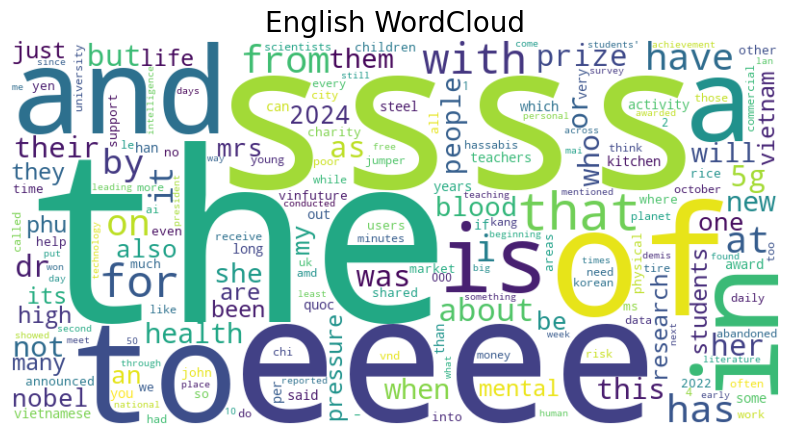

In [33]:
# Hiển thị WordCloud cho tiếng Anh
create_wordcloud(frequency_dict_eng, "English WordCloud")


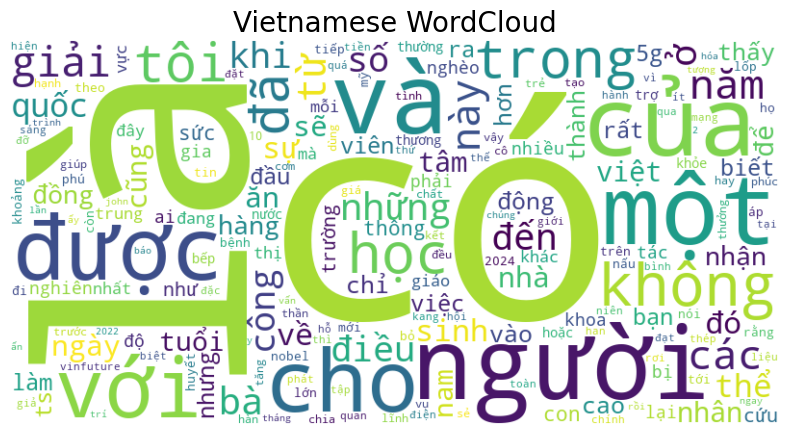

In [34]:

# Hiển thị WordCloud cho tiếng Việt
create_wordcloud(frequency_dict_vi, "Vietnamese WordCloud")

Nice !

### Bar charts


In [35]:
import seaborn as sns
def create_bar_chart(frequency_dict, title, num_words=20):
    # Lấy một số từ có tần suất xuất hiện cao nhất
    sorted_freq = sorted(frequency_dict.items(), key=lambda item: item[1], reverse=True)[:num_words]
    words, frequencies = zip(*sorted_freq)
    
    # Tạo biểu đồ thanh
    plt.figure(figsize=(12, 8))
    sns.barplot(x=frequencies, y=words, palette='viridis')
    plt.title(title, fontsize=20)
    plt.xlabel('Frequency', fontsize=15)
    plt.ylabel('Words', fontsize=15)
    plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_12676\2946051377.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette='viridis')


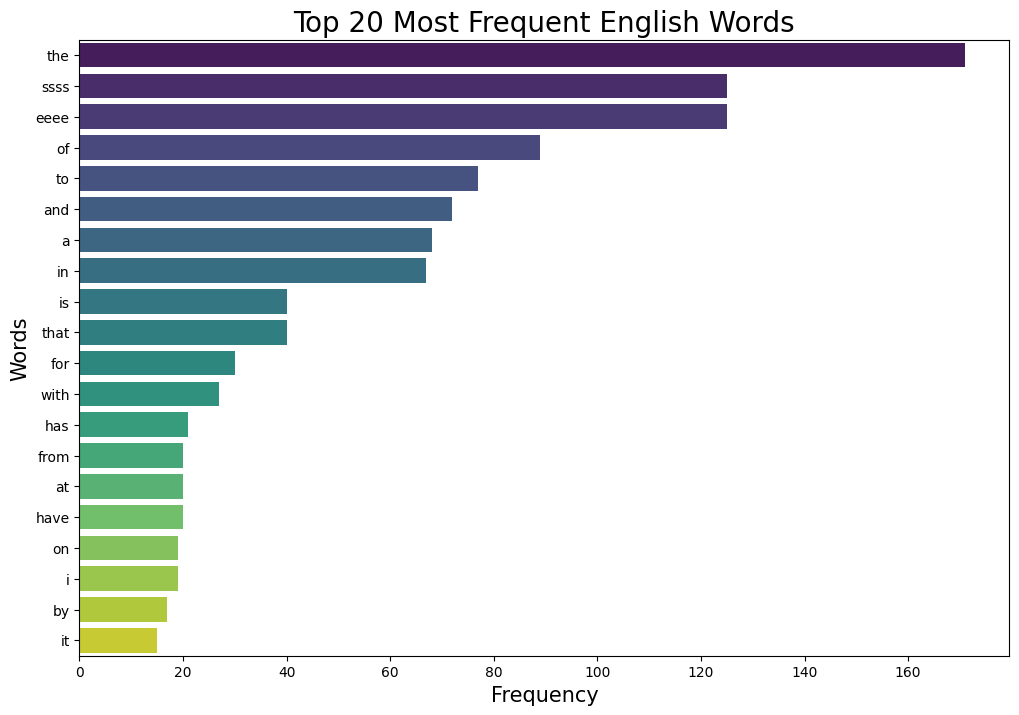

In [36]:
# Hiển thị biểu đồ thanh cho tiếng Anh
create_bar_chart(frequency_dict_eng, "Top 20 Most Frequent English Words")


C:\Users\Admin\AppData\Local\Temp\ipykernel_12676\2946051377.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette='viridis')


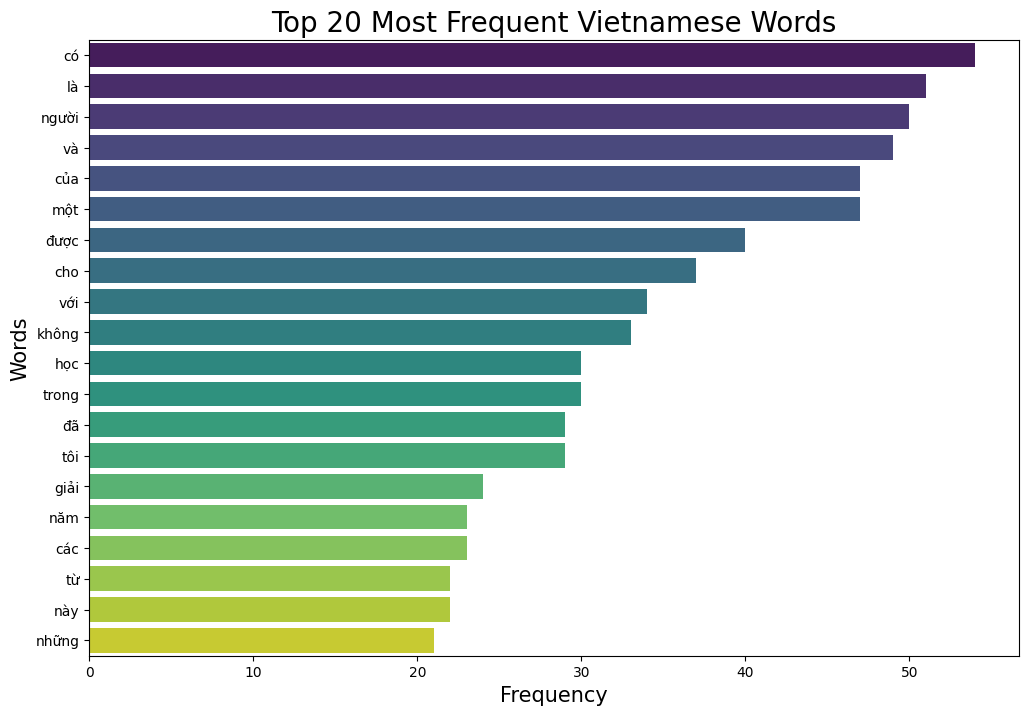

In [37]:
#Hiển thị biểu đồ thanh cho tiếng Việt
create_bar_chart(frequency_dict_vi, "Top 20 Most Frequent Vietnamese Words")